## Setting Up the Environment

Before we start our data analysis, we need to import important Python libraries that will aid in data manipulation and visualization.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

We are loading the dataset into a pandas DataFrame. It contains details about the top 50 bestselling books on Amazon from 2009 to 2019, including their categories.

In [6]:
df=pd.read_csv("bestsellers with categories.csv")

## Displaying the First Few Rows

We are using the head() method to view the first few rows of our DataFrame, df. This gives us a quick overview of the dataset after it has been loaded.

In [11]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## Understanding the dataset:

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [16]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

## Checking the DataFrame Size

In [19]:
df.shape

(550, 7)

## Standardizing Column Names

We clean and standardize the column names in our DataFrame, df. We do this by converting all column names to lowercase and replacing spaces with underscores.

In [23]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Replace spaces with underscores
df.columns = df.columns.str.replace(' ', '_')

# Display the new column names
df.columns

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')

## Numerical Data

In [26]:
df.describe()

,user_rating,reviews,price,year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


## Categorical Data

In [29]:
df.describe(include="object").transpose()

,count,unique,top,freq
name,550,351,Publication Manual of the American Psychologic...,10
author,550,248,Jeff Kinney,12
genre,550,2,Non Fiction,310


## Identifying Missing Values

In [32]:
df.isnull().any()

name           False
author         False
user_rating    False
reviews        False
price          False
year           False
genre          False
dtype: bool

## Listing Unique Years

In [35]:
df.year.unique()

array([2016, 2011, 2018, 2017, 2019, 2014, 2010, 2009, 2015, 2013, 2012],
      dtype=int64)

## Listing Unique Genres

In [38]:
df.genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [40]:
genre_count=df.genre.value_counts()
print(genre_count)

genre
Non Fiction    310
Fiction        240
Name: count, dtype: int64


## Visualizing Genre Distribution

<Axes: xlabel='count', ylabel='genre'>

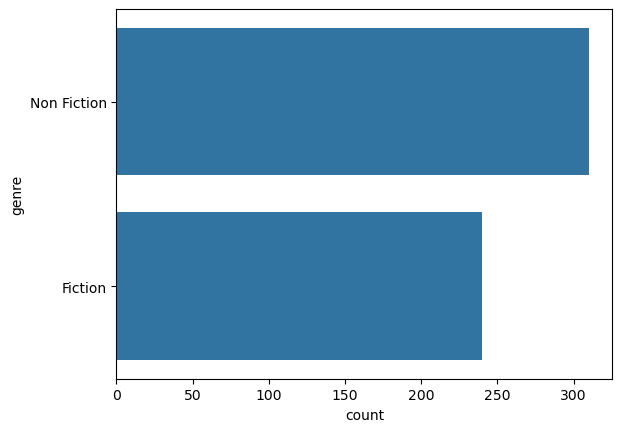

In [43]:
sns.countplot(df.genre)

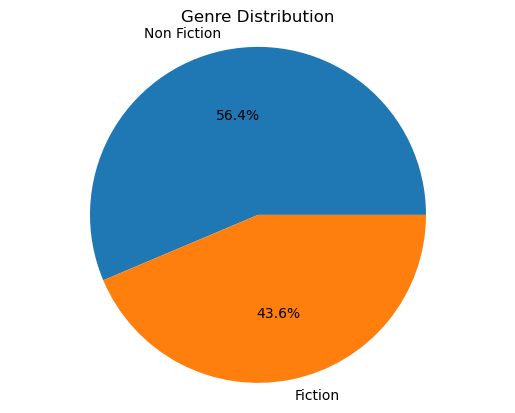

<Figure size 640x480 with 0 Axes>

In [45]:
plt.pie(genre_count,autopct='%1.1f%%',labels=genre_count.index)
plt.axis('Equal')
plt.title('Genre Distribution')
plt.show()
plt.clf()

Text(0.5, 1.0, 'Trend Over Year for Each Genre')

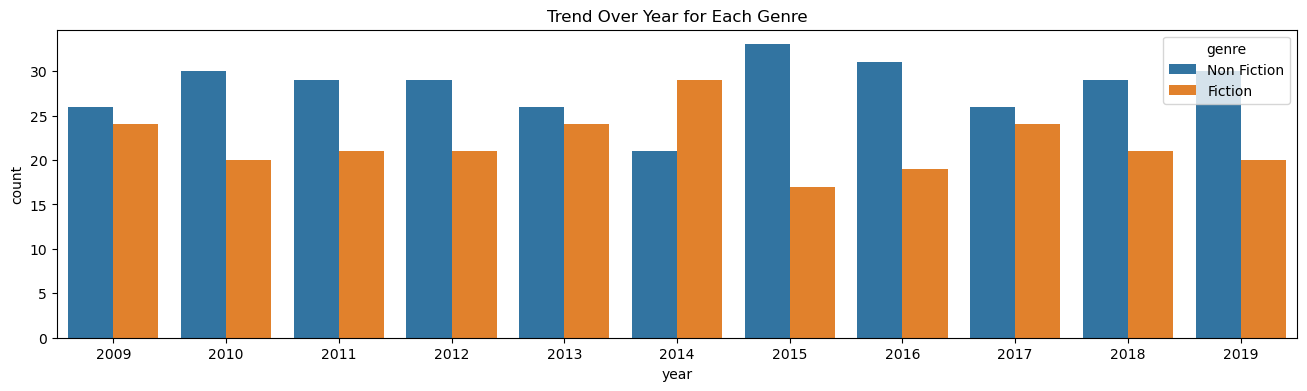

In [47]:
plt.figure(figsize=(16,4))
sns.countplot(x='year',data=df,hue='genre')
plt.title("Trend Over Year for Each Genre")

## Data Aggregation by Genre:

Aggregate the minimum and maximum prices for books within each genre.

In [50]:
df_fiction_non_fiction_price = df[['genre', 'price']].groupby('genre').agg(['min', 'max'])
print('New dataframe:')
df_fiction_non_fiction_price

New dataframe:


price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

## Author Book Count:

Calculates the number of books each author has in the dataset.

In [53]:
# Group the dataframe by 'author' and count the number of books per author
df_num_books_per_author = df[['author', 'name']].groupby('author').agg('count').reset_index()
# Rename the columns to 'author' and 'books_count'
df_num_books_per_author.columns = ['author', 'books_count']
# Display the dataframe with the number of books per author
print("Dataframe of authors with the number of books:")
df_num_books_per_author

Dataframe of authors with the number of books:


,author,books_count
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


## Lowest Rated books

In [56]:
lowest_rated = df[df["user_rating"]==df["user_rating"].min()]
lowest_rated

,name,author,user_rating,reviews,price,year,genre
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction


## Highest Rated books

In [59]:
highest_rated =df[df["user_rating"]==df["user_rating"].max()].drop_duplicates("name")
highest_rated

,name,author,user_rating,reviews,price,year,genre
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,2019,Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction


## Identifying the Author with Most Books:

This step determines which author has the highest number of books in the df_num_books_per_author dataframe.

In [62]:
most_books_author = df_num_books_per_author.loc[df_num_books_per_author['books_count'].idxmax()]
most_books_author

author         Jeff Kinney
books_count             12
Name: 120, dtype: object

## Average Rating by Author:

This step calculates the average user rating for each author in the dataset.

In [65]:
df_author_avg_rating = df[['author', 'user_rating']].groupby('author').agg('mean').round(2).reset_index()

df_author_avg_rating.columns = ['author', 'avg_rating']

print('New dataframe:')
df_author_avg_rating

New dataframe:


,author,avg_rating
0,Abraham Verghese,4.60
1,Adam Gasiewski,4.40
2,Adam Mansbach,4.80
3,Adir Levy,4.80
4,Admiral William H. McRaven,4.70
...,...,...
243,Walter Isaacson,4.57
244,William Davis,4.40
245,William P. Young,4.60
246,Wizards RPG Team,4.80


## Reviews Trend Over Years:

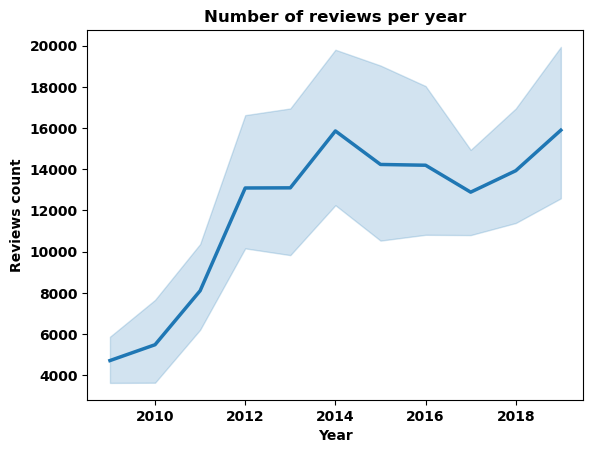

<Figure size 640x480 with 0 Axes>

In [68]:
sns.lineplot(x='year', y='reviews', data=df, linewidth=2.5)
plt.xlabel("Year", fontweight='bold')
plt.ylabel("Reviews count", fontweight='bold')
plt.title("Number of reviews per year", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()
plt.clf()

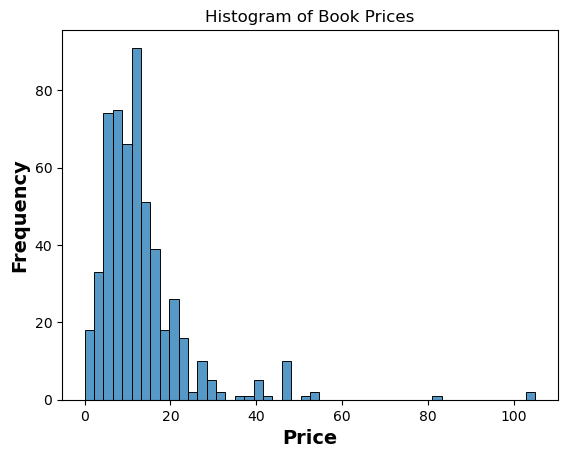

In [70]:
sns.histplot(df['price'])
plt.title('Histogram of Book Prices')
plt.xlabel('Price', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.show()

## Outlier Detection and Treatment

Boxplots are effective for identifying outliers. Once outliers are detected, they can be imputed using the 5th and 95th percentiles.

<Axes: ylabel='price'>

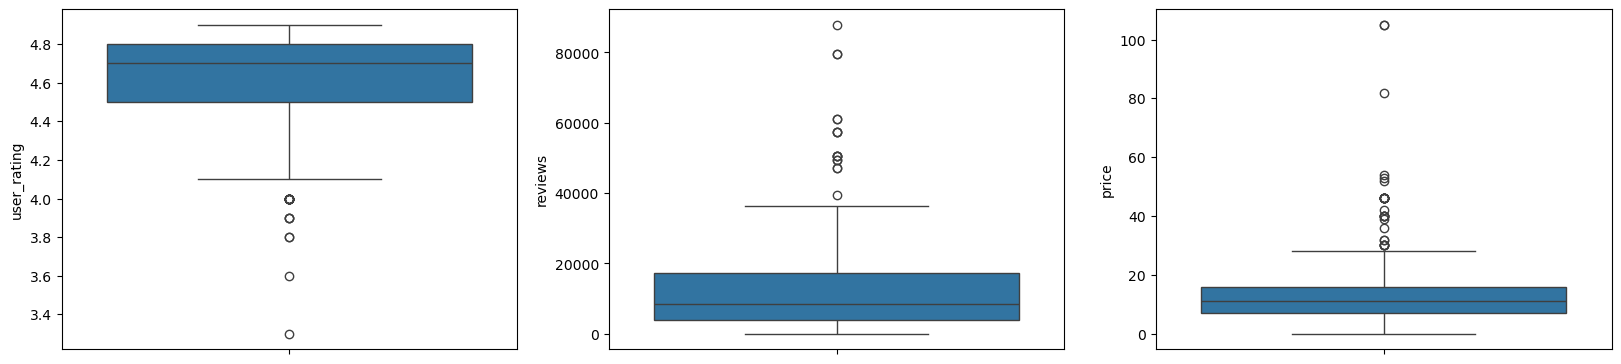

In [74]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(df.user_rating)

plt.subplot(3,3,2)
sns.boxplot(df.reviews)

plt.subplot(3,3,3)
sns.boxplot(df.price)

In [76]:
df['price']=df['price'].clip(lower=df['price'].quantile(0.05),upper=df['price'].quantile(0.95))
df['user_rating']=df['user_rating'].clip(lower=df['user_rating'].quantile(0.05),upper=df['user_rating'].quantile(0.95))
df['reviews']=df['reviews'].clip(lower=df['reviews'].quantile(0.05),upper=df['reviews'].quantile(0.95))

<Axes: ylabel='price'>

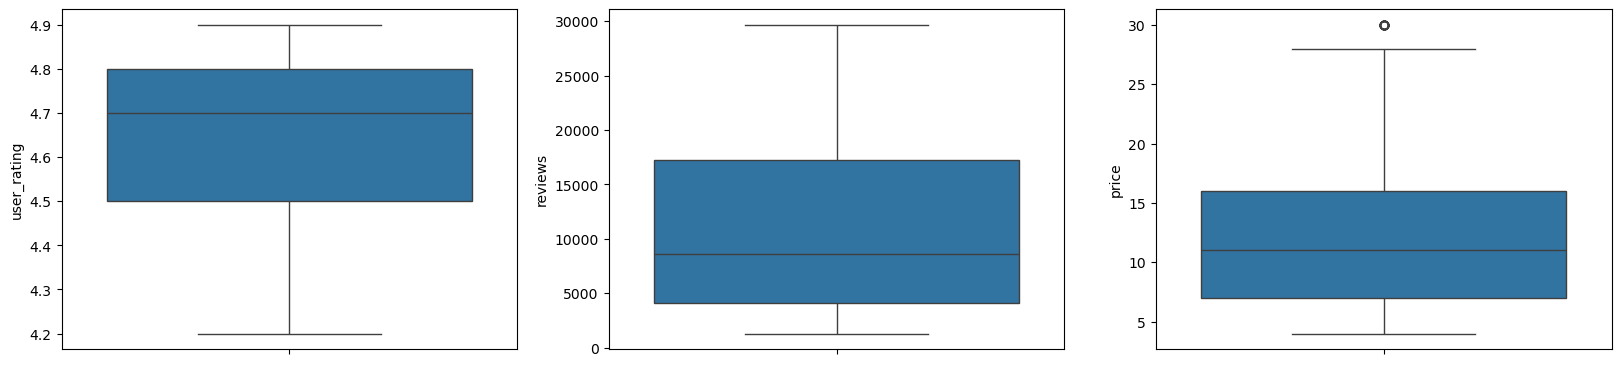

In [78]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(df.user_rating)

plt.subplot(3,3,2)
sns.boxplot(df.reviews)

plt.subplot(3,3,3)
sns.boxplot(df.price)